In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")

df = pd.read_csv("C:/ML/python/data/iran.csv",delimiter=',')
df.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comments,label
0,How to stop the war Stop the media escalating it,1
1,WW1 : History Books WW2 : History Books WW3 : ...,1
2,Let the politicians go to war and soldiers tak...,1
3,We'll be praying for the peace of everyone.......,1
4,We are praying that this won't go too far. Ble...,1
5,This year is going to be interesting,1
6,USA vs Iran = Iraq suffers War freaks should f...,1
7,Sort it out like men. Have a boxing match inst...,1
8,3:00 - She said “I hope the revenge continues....,1
9,They shot that plane down the evidence is in i...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  526 non-null    object
 1   label     527 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


<Axes: ylabel='count'>

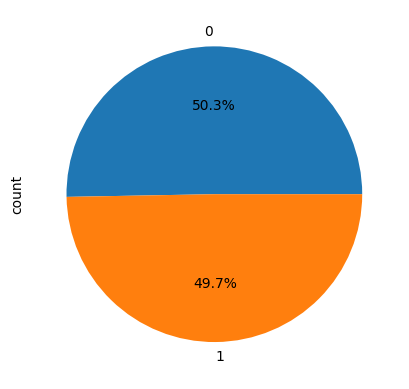

In [2]:

df.info()
df.isna().sum()
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df['label'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [3]:
df['Comments'] = df['Comments'].str.lower()
import re

def remove_html_tags(text):
    pattern = r'<.*?>'
    text = re.sub(pattern,"",text)
    return text


df['Comments'] = df['Comments'].apply(remove_html_tags)
df['Comments'].head(10)

0     how to stop the war stop the media escalating it
1    ww1 : history books ww2 : history books ww3 : ...
2    let the politicians go to war and soldiers tak...
3    we'll be praying for the peace of everyone.......
4    we are praying that this won't go too far. ble...
5                 this year is going to be interesting
6    usa vs iran = iraq suffers war freaks should f...
7    sort it out like men. have a boxing match inst...
8    3:00 - she said “i hope the revenge continues....
9    they shot that plane down the evidence is in i...
Name: Comments, dtype: object

In [4]:
import string

PUNC = string.punctuation

def remove_punctuations(text):
    return text.translate(str.maketrans("","",PUNC))

df['Comments'] = df['Comments'].apply(remove_punctuations)

df['Comments'] = df['Comments'].str.replace(r'\d', '')

In [5]:
sw = set(stopwords.words("english"))
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)

df['Comments'] = df['Comments'].apply(remove_stopwords)
df['Comments'].head(10)

0                       stop war stop media escalating
1    ww1 history books ww2 history books ww3 youtub...
2       let politicians go war soldiers take rest time
3          well praying peace everyonefrom philippines
4       praying wont go far blessings everyone hungary
5                               year going interesting
6    usa vs iran iraq suffers war freaks fight wars...
7               sort like men boxing match instead war
8    300 said “ hope revenge continues ” iran shoot...
9                             shot plane evidence self
Name: Comments, dtype: object

In [6]:
lemma = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)


df['Comments'] = df['Comments'].apply(lemmatization)
df['Comments'].head(10)

0                      stop war stop medium escalating
1    ww1 history book ww2 history book ww3 youtube ...
2         let politician go war soldier take rest time
3           well praying peace everyonefrom philippine
4        praying wont go far blessing everyone hungary
5                               year going interesting
6    usa v iran iraq suffers war freak fight war la...
7               sort like men boxing match instead war
8    300 said “ hope revenge continues ” iran shoot...
9                             shot plane evidence self
Name: Comments, dtype: object

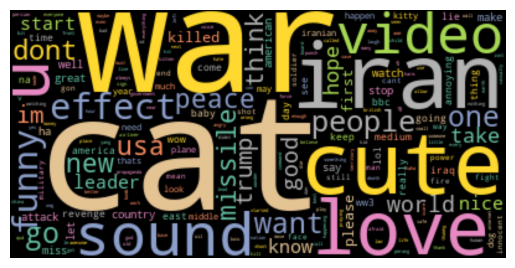

In [7]:
text = " ".join(i for i in df['Comments'])

from wordcloud import WordCloud

wc = WordCloud(colormap="Set2",collocations=False).generate(text)
plt.imshow(wc,interpolation="gaussian")
plt.axis("off")
plt.show()


In [8]:
from textblob import TextBlob

blob = TextBlob(text)

from nltk.probability import FreqDist

most_frequent_words = FreqDist(blob.words)
top_50_words = most_frequent_words.most_common(50)
print("top 50 most common comments: ",top_50_words)

top 50 most common comments:  [('cat', 74), ('war', 63), ('iran', 55), ('cute', 50), ('love', 40), ('like', 34), ('u', 32), ('sound', 28), ('video', 25), ('effect', 22), ('funny', 20), ('people', 19), ('go', 18), ('one', 18), ('want', 18), ('’', 18), ('dont', 17), ('peace', 16), ('usa', 16), ('missile', 16), ('would', 15), ('think', 15), ('im', 14), ('trump', 14), ('good', 13), ('world', 13), ('take', 11), ('hope', 11), ('leader', 11), ('nice', 11), ('know', 11), ('start', 11), ('killed', 11), ('first', 11), ('get', 11), ('please', 11), ('country', 10), ('make', 10), ('2020', 10), ('great', 10), ('ha', 10), ('stop', 9), ('let', 9), ('well', 9), ('news', 9), ('american', 9), ('say', 9), ('watch', 9), ('attack', 9), ('miss', 9)]


<Axes: ylabel='count'>

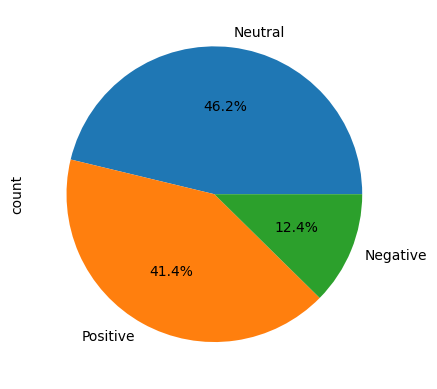

In [9]:
def polarity(text):
    return TextBlob(text).polarity



df['polarity'] = df['Comments'].apply(polarity)



def sentiment(label):
    if label <0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label >= 0:
        return "Positive"


df['sentiment'] = df['polarity'].apply(sentiment)

df['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

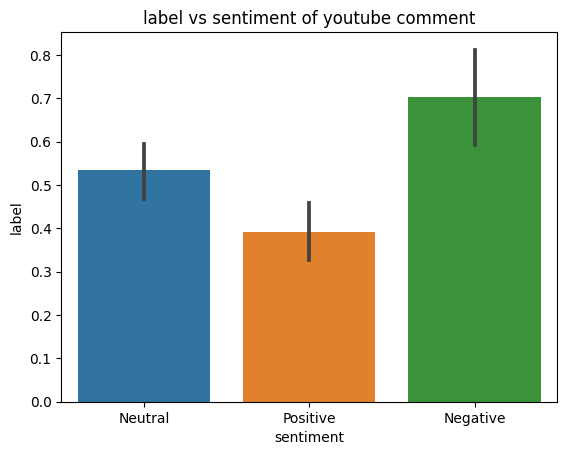

In [10]:
####Cats > Gats

import seaborn as sns

sns.barplot(x=df['sentiment'],y=df['label'])
plt.title("label vs sentiment of youtube comment")
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

from sklearn.model_selection import train_test_split
X = df['Comments']
X = cv.fit_transform(X).toarray()
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)



from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

from sklearn.metrics import accuracy_score,classification_report

def model_(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test, pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --Classification Report-- {clf_rpt}')
    return pred

lr_pred = model_(X_train, X_test, y_train, y_test, lr)
GNB_pred = model_(X_train, X_test, y_train, y_test,GNB)
MNB_pred = model_(X_train, X_test, y_train, y_test, MNB)
BNB_pred = model_(X_train, X_test, y_train, y_test, BNB)

LogisticRegression, --ACC-- 82.69%; --Classification Report--               precision    recall  f1-score   support

           0       0.72      0.98      0.83        45
           1       0.98      0.71      0.82        59

    accuracy                           0.83       104
   macro avg       0.85      0.84      0.83       104
weighted avg       0.87      0.83      0.83       104

GaussianNB, --ACC-- 86.54%; --Classification Report--               precision    recall  f1-score   support

           0       0.82      0.89      0.85        45
           1       0.91      0.85      0.88        59

    accuracy                           0.87       104
   macro avg       0.86      0.87      0.86       104
weighted avg       0.87      0.87      0.87       104

MultinomialNB, --ACC-- 81.73%; --Classification Report--               precision    recall  f1-score   support

           0       0.72      0.96      0.82        45
           1       0.95      0.71      0.82        59

    accur

In [12]:
X = df['Comments']
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=1)


from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print(len(word_index))

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length


print(max_length)

1528
104


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.5597 - loss: 0.6905 - val_accuracy: 0.7159 - val_loss: 0.6730
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6859 - loss: 0.6680 - val_accuracy: 0.7386 - val_loss: 0.6127
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7575 - loss: 0.6057 - val_accuracy: 0.7841 - val_loss: 0.5555
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7401 - loss: 0.5286 - val_accuracy: 0.7955 - val_loss: 0.4529
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8817 - loss: 0.3538 - val_accuracy: 0.9205 - val_loss: 0.2834
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9279 - loss: 0.2032 - val_accuracy: 0.8750 - val_loss: 0.2666
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9856 - loss: 0.0857 - val_accuracy: 0.9091 - val_loss: 0.1869
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9811 - loss: 0.0618 - val_accuracy: 0.9091 - v

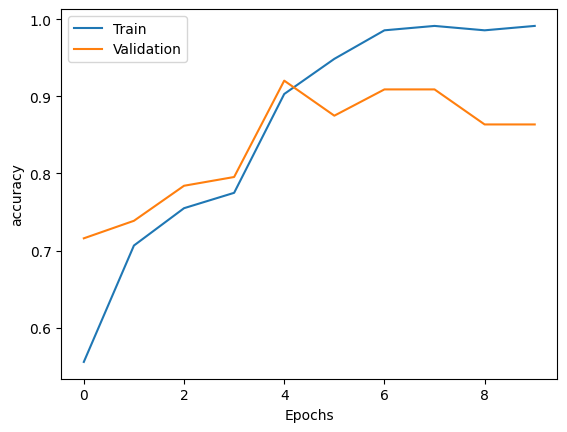

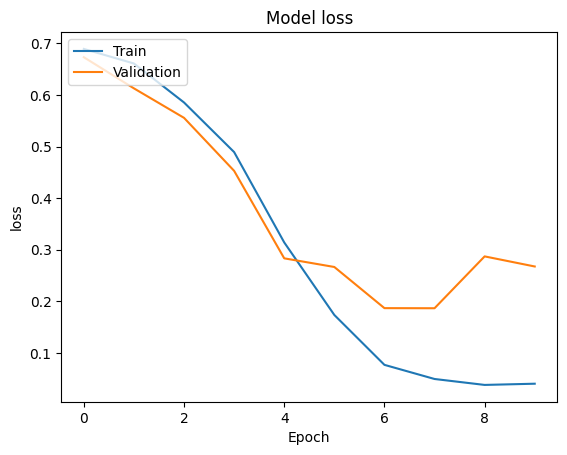

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



from tensorflow.keras.utils import pad_sequences

X_train = pad_sequences(X_train,maxlen=max_length,padding='post')
X_test = pad_sequences(X_test,maxlen=max_length,padding='post')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,Dropout,SpatialDropout1D

RNN = Sequential()
RNN.add(Embedding(input_dim=(len(word_index) + 1),output_dim=150,input_length=max_length))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(50,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.2))
RNN.add(Dense(100,activation='relu'))
RNN.add(Dropout(0.1))
RNN.add(Dense(2,activation='sigmoid'))
RNN.summary()
RNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = RNN.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2)



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
#bad

from sklearn.metrics import roc_auc_score
pred = RNN.predict(X_test)
roc = roc_auc_score(y_test,pred)
print(f"roc_auc score: {roc*100:.2f}")

#### This is dog shit


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
roc_auc score: 96.99


In [15]:
#################### Trash